# Table of Contents
<br>
<ol>
    <ol>
        <h2>1. <a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Infected/Uninfected Users</a></h2>
     </ol>
    <br>
    <ol>
        <h2>2. <a href='#2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected/Infected Users</a></h2>
     </ol>
</ol>

In [29]:
import os
import progressbar as pb
from progressbar import ProgressBar, Percentage, Bar, ETA, FileTransferSpeed
import time
import multiprocessing

import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
import pprint
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D


import scipy as sp
from scipy import stats
from mca import *
from scipy.stats import boxcox
import hdbscan


%matplotlib inline
pd.set_option("display.max_columns",80)
pd.set_option('display.max_rows', 1200)
warnings.filterwarnings("ignore")

from IPython.display import HTML

import plotly
import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go
cf.go_offline()
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.graph_objs import *
# tls.set_credentials_file(username='darshan.bhansali', api_key='38zZ2TS4ob4feqV0bvR0')
# tls.set_credentials_file(username='darshan-b', api_key='KuC894mmVN7kBiZZyffO')
# tls.set_credentials_file(username='darshan18', api_key='dhwPNrhtYUy2iMbQqALn')

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,FeatureAgglomeration,KMeans,FeatureAgglomeration, DBSCAN,SpectralClustering,Birch,MeanShift

In [30]:
z=pd.read_csv('Feature_with_Hour_Class_Dest.csv')
z.set_index(['Source_User'],drop=True,inplace=True)

In [31]:
z.head(2)

Count  Packets Received  \
Source_User                                                                   
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...   3143         47.552339   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...   4033         82.857426   

                                                    Packets Sent  \
Source_User                                                        
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...     27.085905   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...     44.838334   

                                                    Elapsed_Time   Bytes_sent  \
Source_User                                                                     
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...     96.415845  4585.223353   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...     57.419043  6043.387801   

                                                    Bytes_received  \
Source_User                                                          
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...    53140.855234   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...   103659.874039   

                                                    Source_Port  \
Source_User                                                       
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...       3003.0   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...       3538.0   

                                                    Destination_Port  \
Source_User                                                            
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...              14.0   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...              18.0   

                                                    Application  Source_IP  \
Source_User                                                                  
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...           37         21   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...           37         26   

                                                    Destination_IP  \
Source_User                                                          
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...             906   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...             566   

                                                        Target  \
Source_User                                                      
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...  uninfected   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...  uninfected   

                                                    Received_Time_diff    0  \
Source_User                                                                   
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...          851.246898  204   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...          663.193900  282   

                                                      1   2    3    4    5  \
Source_User                                                                  
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...  103  91   41   41   14   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...  355  90  254  178  207   

                                                      6   7    8    9   10  \
Source_User                                                                  
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...   22  69  158  432  160   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...  144  93  127  261  143   

                                                     11   12  13   14  15  \
Source_User                                                                 
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...  155  151  93  162  61   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...   71  199  67  155  40   

                                                     16   17   18   19   20  \
Source_User                                                                   
018d95886bdafee1987165362b6ba

<h2>1. <a id='1' style="text-decoration : none; color : #000000;"> 50:50 Infected/Uninfected Users</a></h2>

In [32]:
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


infected      1215
uninfected    1215
Name: Target, dtype: int64

### feature Set

In [33]:
X=z.iloc[:,z.columns!='Target']
X.head(2)

Count  Packets Received  \
Source_User                                                                   
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...   3143         47.552339   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...   4033         82.857426   

                                                    Packets Sent  \
Source_User                                                        
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...     27.085905   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...     44.838334   

                                                    Elapsed_Time   Bytes_sent  \
Source_User                                                                     
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...     96.415845  4585.223353   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...     57.419043  6043.387801   

                                                    Bytes_received  \
Source_User                                                          
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...    53140.855234   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...   103659.874039   

                                                    Source_Port  \
Source_User                                                       
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...       3003.0   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...       3538.0   

                                                    Destination_Port  \
Source_User                                                            
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...              14.0   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...              18.0   

                                                    Application  Source_IP  \
Source_User                                                                  
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...           37         21   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...           37         26   

                                                    Destination_IP  \
Source_User                                                          
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...             906   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...             566   

                                                    Received_Time_diff    0  \
Source_User                                                                   
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...          851.246898  204   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...          663.193900  282   

                                                      1   2    3    4    5  \
Source_User                                                                  
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...  103  91   41   41   14   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...  355  90  254  178  207   

                                                      6   7    8    9   10  \
Source_User                                                                  
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...   22  69  158  432  160   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...  144  93  127  261  143   

                                                     11   12  13   14  15  \
Source_User                                                                 
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...  155  151  93  162  61   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...   71  199  67  155  40   

                                                     16   17   18   19   20  \
Source_User                                                                   
018d95886bdafee1987165362b6ba7d7486a40eee4b7698...  128  109  212  147   85   
4b29c98096a7c939ec3438152bfa5aec0f53a134f9748a0...   86  113   92  177  104   

                                                     21   22   23  
Source_User                                                        

In [42]:
target=z.Target.reset_index(drop=True)

### Scaled X

In [34]:
orig_X=X.copy()
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)

In [35]:
scaled_X[0:2]

array([[ 1.06028887, -0.35042932, -0.28894052, -0.07456502, -0.15219093,
        -0.36118366,  1.36690381, -0.07282103,  0.78322428, -0.31769309,
         1.47624051, -0.31185609,  1.34277387,  0.34610434,  0.17323505,
        -0.18262473, -0.17349686, -0.33989034, -0.25419061,  0.12209952,
         1.52233459,  6.04812822,  1.94851836,  1.9576404 ,  1.9519024 ,
         0.69740139,  1.58469242,  0.23442274,  0.86577867,  0.45728171,
         1.55957793,  0.83789871,  0.22652109,  0.42299511,  2.10767541,
         0.71395095],
       [ 1.59551457, -0.21046479, -0.17664553, -0.54343507, -0.13228886,
        -0.19367014,  1.78261845, -0.03682162,  0.78322428, -0.01842413,
         0.54583257, -0.31820477,  2.10893217,  2.65035595,  0.16603938,
         1.44455904,  0.8444056 ,  0.98488711,  0.58468849,  0.34288034,
         1.09066454,  3.3458291 ,  1.65404004,  0.40994993,  2.86557885,
         0.27083844,  1.48574476, -0.10467223,  0.36971483,  0.49266613,
         0.32680024,  1.12225

In [46]:
def get_purity(labels):
    d=pd.DataFrame(labels).join(target)
    d.columns=['Cluster_Labels','Target']
    d=d.groupby(['Cluster_Labels','Target']).agg({'Target':len}).unstack().fillna(0).transpose()
    q=d.apply(lambda x: x/x.sum()*100,axis=0)
    mt=d.append(q)
    mt.index=['Infected #','Uninfected #','Infected %','Uninfected %']
    display(mt.round(2))
   
    
def get_kmeans(data):
    distortions=[]
    for i in range(1,5):
        kmeanModel=KMeans(n_clusters=i,random_state=0)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
        get_purity(kmeanModel.labels_)
        print("Sum of square of distances is:",kmeanModel.inertia_)
        print("\n---------------------------------------------------------------------------------------------------------\n")
        print("---------------------------------------------------------------------------------------------------------\n")
    plt.plot(np.arange(1,5), distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances ')
    plt.title('The Elbow Method showing the optimal value of k')
    plt.show()
    print("The minimum sum of sqaures of distances is :",min(distortions)," for k",distortions.index(min(distortions))+1)
    return kmeanModel

### K-Means

Kmeans on data


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 2.36200603981e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1
Infected #      1176.00  39.0
Uninfected #    1189.00  26.0
Infected %        49.73  60.0
Uninfected %      50.27  40.0

Sum of square of distances is: 1.11952829922e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2
Infected #      1094.00   6.00  115.00
Uninfected #    1146.00   5.00   64.00
Infected %        48.84  54.55   64.25
Uninfected %      51.16  45.45   35.75

Sum of square of distances is: 6.34007133584e+13

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1     2        3
Infected #      230.00   4.00  35.0   946.00
Uninfected #    120.00   5.00  21.0  1069.00
Infected %       65.71  44.44  62.5    46.95
Uninfected %     34.29  55.56  37.5    53.05

Sum of square of distances is: 4.05468015084e+13

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



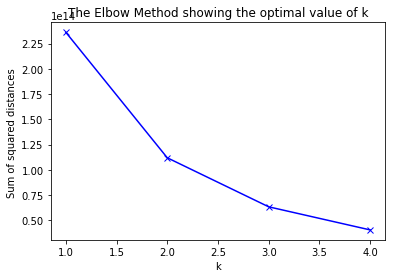

The minimum sum of sqaures of distances is : 4.05468015084e+13  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [47]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 87480.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1
Infected #       526.00  689.00
Uninfected #    1040.00  175.00
Infected %        33.59   79.75
Uninfected %      66.41   20.25

Sum of square of distances is: 65790.8505493

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2
Infected #      717.00   496.00    2.0
Uninfected #    195.00  1020.00    0.0
Infected %       78.62    32.72  100.0
Uninfected %     21.38    67.28    0.0

Sum of square of distances is: 56267.952692

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1       2       3
Infected #      697.00    2.0  179.00  337.00
Uninfected #    252.00    0.0   32.00  931.00
Infected %       73.45  100.0   84.83   26.58
Uninfected %     26.55    0.0   15.17   73.42

Sum of square of distances is: 49831.3719213

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



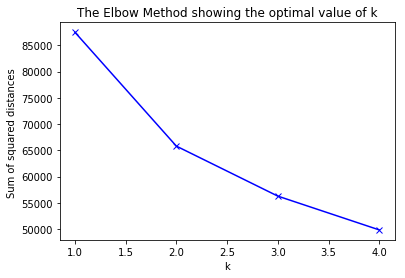

The minimum sum of sqaures of distances is : 49831.3719213  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [48]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.618036130179 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 7287.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1
Infected #      708.00   507.00
Uninfected #    192.00  1023.00
Infected %       78.67    33.14
Uninfected %     21.33    66.86

Sum of square of distances is: 5905.04538904

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1     2
Infected #       558.0  644.0  13.0
Uninfected #    1050.0  153.0  12.0
Infected %        34.7   80.8  52.0
Uninfected %      65.3   19.2  48.0

Sum of square of distances is: 4672.70962137

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2      3
Infected #      647.00   541.00  25.00    2.0
Uninfected #    155.00  1042.00  18.00    0.0
Infected %       80.67    34.18  58.14  100.0
Uninfected %     19.33    65.82  41.86    0.0

Sum of square of distances is: 3570.06300705

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



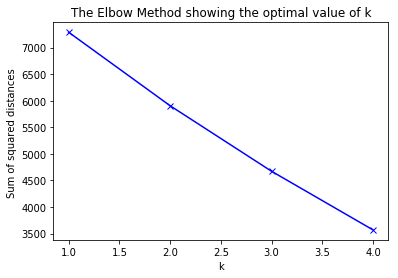

The minimum sum of sqaures of distances is : 3570.06300705  for k 4


In [50]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.665709819716 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 9716.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1
Infected #      619.00  596.00
Uninfected #    244.00  971.00
Infected %       71.73   38.03
Uninfected %     28.27   61.97

Sum of square of distances is: 8296.39216711

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1      2
Infected #      735.00  478.00    2.0
Uninfected #    251.00  964.00    0.0
Infected %       74.54   33.15  100.0
Uninfected %     25.46   66.85    0.0

Sum of square of distances is: 6895.77155038

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1     2      3
Infected #      527.00  673.00  13.0    2.0
Uninfected #    204.00  999.00  12.0    0.0
Infected %       72.09   40.25  52.0  100.0
Uninfected %     27.91   59.75  48.0    0.0

Sum of square of distances is: 5634.06663937

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



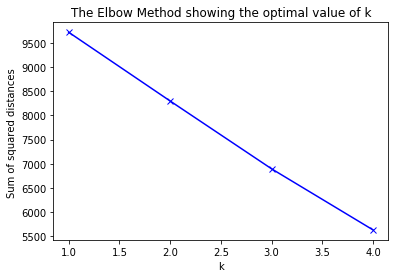

The minimum sum of sqaures of distances is : 5634.06663937  for k 4


In [51]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.70881890416 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 12145.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      1213.00    2.0
Uninfected #    1215.00    0.0
Infected %        49.96  100.0
Uninfected %      50.04    0.0

Sum of square of distances is: 10345.8881643

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1      2
Infected #        2.0  392.0  821.0
Uninfected #      0.0  937.0  278.0
Infected %      100.0   29.5   74.7
Uninfected %      0.0   70.5   25.3

Sum of square of distances is: 8824.82327156

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1       2      3
Infected #      746.00  363.00  104.00    2.0
Uninfected #    305.00  888.00   22.00    0.0
Infected %       70.98   29.02   82.54  100.0
Uninfected %     29.02   70.98   17.46    0.0

Sum of square of distances is: 7599.365657

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



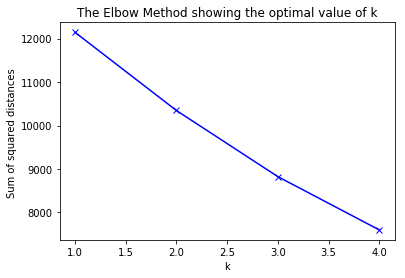

The minimum sum of sqaures of distances is : 7599.365657  for k 4


In [52]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.743564433286 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 14574.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      1213.00    2.0
Uninfected #    1215.00    0.0
Infected %        49.96  100.0
Uninfected %      50.04    0.0

Sum of square of distances is: 12712.8519169

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1       2
Infected #      407.00    1.0  807.00
Uninfected #    948.00    0.0  267.00
Infected %       30.04  100.0   75.14
Uninfected %     69.96    0.0   24.86

Sum of square of distances is: 11615.9459286

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1       2      3
Infected #      525.00  430.00  258.00    2.0
Uninfected #    213.00  940.00   62.00    0.0
Infected %       71.14   31.39   80.62  100.0
Uninfected %     28.86   68.61   19.38    0.0

Sum of square of distances is: 9973.68562825

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



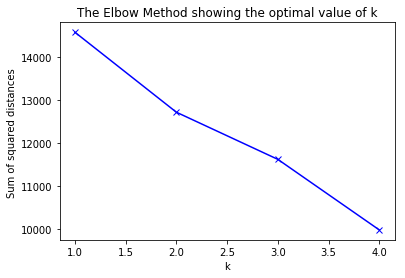

The minimum sum of sqaures of distances is : 9973.68562825  for k 4


In [53]:
### PCA on scaled data using 5 components
pca=PCA(n_components=6,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.821040569105 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 21861.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0     1
Infected #      1212.0   3.0
Uninfected #    1212.0   3.0
Infected %        50.0  50.0
Uninfected %      50.0  50.0

Sum of square of distances is: 19896.810115

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1     2
Infected #      388.00  824.00   3.0
Uninfected #    904.00  308.00   3.0
Infected %       30.03   72.79  50.0
Uninfected %     69.97   27.21  50.0

Sum of square of distances is: 18272.0979779

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0        1     2      3
Infected #      362.0   849.00   3.0    1.0
Uninfected #     86.0  1126.00   3.0    0.0
Infected %       80.8    42.99  50.0  100.0
Uninfected %     19.2    57.01  50.0    0.0

Sum of square of distances is: 16626.6154179

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



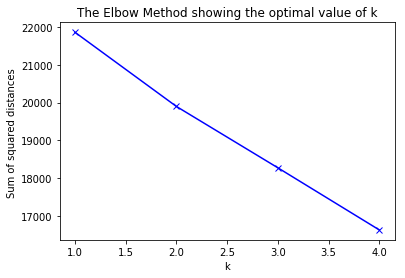

The minimum sum of sqaures of distances is : 16626.6154179  for k 4


In [58]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.858667852839 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 26719.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      1214.00    1.0
Uninfected #    1215.00    0.0
Infected %        49.98  100.0
Uninfected %      50.02    0.0

Sum of square of distances is: 24781.310274

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1     2
Infected #       718.00  494.00   3.0
Uninfected #    1080.00  132.00   3.0
Infected %        39.93   78.91  50.0
Uninfected %      60.07   21.09  50.0

Sum of square of distances is: 23170.2881231

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1       2      3
Infected #      113.00  771.00  330.00    1.0
Uninfected #     25.00  346.00  844.00    0.0
Infected %       81.88   69.02   28.11  100.0
Uninfected %     18.12   30.98   71.89    0.0

Sum of square of distances is: 21807.1198512

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



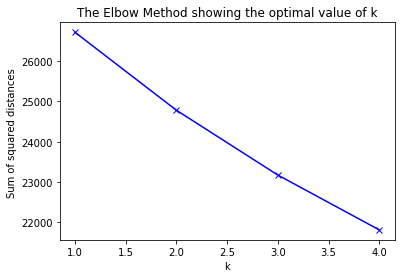

The minimum sum of sqaures of distances is : 21807.1198512  for k 4


In [59]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.87449393743 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

Sum of square of distances is: 29148.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1
Infected #      382.00  833.00
Uninfected #    879.00  336.00
Infected %       30.29   71.26
Uninfected %     69.71   28.74

Sum of square of distances is: 27518.547123

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2
Infected #      473.00   741.00    1.0
Uninfected #    136.00  1079.00    0.0
Infected %       77.67    40.71  100.0
Uninfected %     22.33    59.29    0.0

Sum of square of distances is: 25603.7865584

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1     2      3
Infected #       712.00  499.00   3.0    1.0
Uninfected #    1080.00  132.00   3.0    0.0
Infected %        39.73   79.08  50.0  100.0
Uninfected %      60.27   20.92  50.0    0.0

Sum of square of distances is: 23630.6139576

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



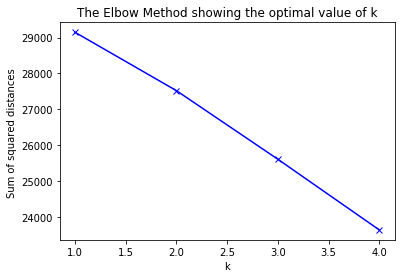

The minimum sum of sqaures of distances is : 23630.6139576  for k 4


In [60]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### Agglomerative Clustering using PCA-12

In [61]:
def get_agg(data,affinity,linkage='ward'):
    distortions=[]
    for i in range(1,15):
        agg=AgglomerativeClustering(n_clusters=i,affinity=affinity,linkage=linkage)
        agg.fit(data)
        get_purity(agg.labels_)
        print("-------------------------------------------------------------------------------")
    return agg

In [63]:
print("AgglomerativeClustering with PCA and affinity='euclidean'")
get_agg(X_pca_scaled_12,'euclidean','ward')

AgglomerativeClustering with PCA and affinity='euclidean'


Cluster_Labels       0
Infected #      1215.0
Uninfected #    1215.0
Infected %        50.0
Uninfected %      50.0

-------------------------------------------------------------------------------


Cluster_Labels      0        1
Infected #       4.00  1211.00
Uninfected #     3.00  1212.00
Infected %      57.14    49.98
Uninfected %    42.86    50.02

-------------------------------------------------------------------------------


Cluster_Labels        0     1      2
Infected #      1211.00   3.0    1.0
Uninfected #    1212.00   3.0    0.0
Infected %        49.98  50.0  100.0
Uninfected %      50.02  50.0    0.0

-------------------------------------------------------------------------------


Cluster_Labels        0     1      2      3
Infected #      1208.00   3.0    1.0    3.0
Uninfected #    1212.00   3.0    0.0    0.0
Infected %        49.92  50.0  100.0  100.0
Uninfected %      50.08  50.0    0.0    0.0

-------------------------------------------------------------------------------


Cluster_Labels      0        1      2      3     4
Infected #       1.00  1207.00    1.0    3.0   3.0
Uninfected #     6.00  1206.00    0.0    0.0   3.0
Infected %      14.29    50.02  100.0  100.0  50.0
Uninfected %    85.71    49.98    0.0    0.0  50.0

-------------------------------------------------------------------------------


Cluster_Labels        0     1      2      3      4      5
Infected #      1207.00   3.0    1.0    3.0    0.0    1.0
Uninfected #    1206.00   3.0    0.0    0.0    6.0    0.0
Infected %        50.02  50.0  100.0  100.0    0.0  100.0
Uninfected %      49.98  50.0    0.0    0.0  100.0    0.0

-------------------------------------------------------------------------------


Cluster_Labels        0     1      2      3      4      5      6
Infected #      1164.00   3.0  43.00    3.0    0.0    1.0    1.0
Uninfected #    1177.00   3.0  29.00    0.0    6.0    0.0    0.0
Infected %        49.72  50.0  59.72  100.0    0.0  100.0  100.0
Uninfected %      50.28  50.0  40.28    0.0  100.0    0.0    0.0

-------------------------------------------------------------------------------


Cluster_Labels        0       1      2     3      4      5      6      7
Infected #      1106.00   58.00  43.00   3.0    0.0    1.0    1.0    3.0
Uninfected #     739.00  438.00  29.00   3.0    6.0    0.0    0.0    0.0
Infected %        59.95   11.69  59.72  50.0    0.0  100.0  100.0  100.0
Uninfected %      40.05   88.31  40.28  50.0  100.0    0.0    0.0    0.0

-------------------------------------------------------------------------------


Cluster_Labels        0      1      2       3      4      5      6      7  \
Infected #      1056.00  50.00  43.00   58.00    0.0    1.0    1.0    3.0   
Uninfected #     726.00  13.00  29.00  438.00    6.0    0.0    0.0    0.0   
Infected %        59.26  79.37  59.72   11.69    0.0  100.0  100.0  100.0   
Uninfected %      40.74  20.63  40.28   88.31  100.0    0.0    0.0    0.0   

Cluster_Labels     8  
Infected #       3.0  
Uninfected #     3.0  
Infected %      50.0  
Uninfected %    50.0

-------------------------------------------------------------------------------


Cluster_Labels        0      1      2       3      4      5      6      7  \
Infected #      1056.00  50.00  43.00   58.00    0.0    1.0    1.0    3.0   
Uninfected #     719.00  13.00  29.00  438.00    7.0    0.0    0.0    0.0   
Infected %        59.49  79.37  59.72   11.69    0.0  100.0  100.0  100.0   
Uninfected %      40.51  20.63  40.28   88.31  100.0    0.0    0.0    0.0   

Cluster_Labels     8      9  
Infected #       3.0    0.0  
Uninfected #     3.0    6.0  
Infected %      50.0    0.0  
Uninfected %    50.0  100.0

-------------------------------------------------------------------------------


Cluster_Labels     0      1      2       3      4      5      6      7     8   \
Infected #      976.0  50.00  43.00   58.00  80.00    1.0    1.0    3.0   3.0   
Uninfected #    684.0  13.00  29.00  438.00  35.00    0.0    0.0    0.0   3.0   
Infected %       58.8  79.37  59.72   11.69  69.57  100.0  100.0  100.0  50.0   
Uninfected %     41.2  20.63  40.28   88.31  30.43    0.0    0.0    0.0  50.0   

Cluster_Labels     9      10  
Infected #        0.0    0.0  
Uninfected #      6.0    7.0  
Infected %        0.0    0.0  
Uninfected %    100.0  100.0

-------------------------------------------------------------------------------


Cluster_Labels     0       1      2       3      4       5      6      7   \
Infected #      50.00  809.00  43.00   58.00  80.00  167.00    1.0    3.0   
Uninfected #    13.00  561.00  29.00  438.00  35.00  123.00    0.0    0.0   
Infected %      79.37   59.05  59.72   11.69  69.57   57.59  100.0  100.0   
Uninfected %    20.63   40.95  40.28   88.31  30.43   42.41    0.0    0.0   

Cluster_Labels    8      9      10     11  
Infected #       3.0    0.0    0.0    1.0  
Uninfected #     3.0    6.0    7.0    0.0  
Infected %      50.0    0.0    0.0  100.0  
Uninfected %    50.0  100.0  100.0    0.0

-------------------------------------------------------------------------------


Cluster_Labels      0       1      2      3      4       5      6      7   \
Infected #      809.00   58.00  43.00  49.00  80.00  167.00    1.0    3.0   
Uninfected #    561.00  438.00  29.00  13.00  35.00  123.00    0.0    0.0   
Infected %       59.05   11.69  59.72  79.03  69.57   57.59  100.0  100.0   
Uninfected %     40.95   88.31  40.28  20.97  30.43   42.41    0.0    0.0   

Cluster_Labels    8      9      10     11     12  
Infected #       3.0    0.0    0.0    1.0    1.0  
Uninfected #     3.0    6.0    7.0    0.0    0.0  
Infected %      50.0    0.0    0.0  100.0  100.0  
Uninfected %    50.0  100.0  100.0    0.0    0.0

-------------------------------------------------------------------------------


Cluster_Labels     0       1       2      3      4       5      6      7   \
Infected #      335.0   58.00  474.00  49.00  80.00  167.00  43.00    3.0   
Uninfected #    122.0  438.00  439.00  13.00  35.00  123.00  29.00    0.0   
Infected %       73.3   11.69   51.92  79.03  69.57   57.59  59.72  100.0   
Uninfected %     26.7   88.31   48.08  20.97  30.43   42.41  40.28    0.0   

Cluster_Labels    8      9      10     11     12     13  
Infected #       3.0    0.0    0.0    1.0    1.0    1.0  
Uninfected #     3.0    6.0    7.0    0.0    0.0    0.0  
Infected %      50.0    0.0    0.0  100.0  100.0  100.0  
Uninfected %    50.0  100.0  100.0    0.0    0.0    0.0

-------------------------------------------------------------------------------


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=14,
            pooling_func=<function mean at 0x7f1118103158>)

<h2>2. <a id='2' style="text-decoration : none; color : #000000;"> 70:30 Infected/Uninfected Users</a></h2>

In [83]:
z=pd.read_csv('Feature_with_Hour_Class_70_30.csv')
z.set_index(['Source_User'],drop=True,inplace=True)
print("Infected/Uninfected Users")
z.Target.value_counts()

Infected/Uninfected Users


0    2832
1    1215
Name: Target, dtype: int64

### feature Set

In [84]:
X=z.iloc[:,z.columns!='Target']
X.head(2)

Count  Packets Received  \
Source_User                                                                   
f312c5ac2868560b18b854fe68465445253bb1850ca9092...   2526        152.272763   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   2507        132.393299   

                                                    Packets Sent  \
Source_User                                                        
f312c5ac2868560b18b854fe68465445253bb1850ca9092...    115.762470   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...     56.954128   

                                                    Elapsed_Time  \
Source_User                                                        
f312c5ac2868560b18b854fe68465445253bb1850ca9092...    102.322249   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...     90.832469   

                                                      Bytes_sent  \
Source_User                                                        
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  18103.792953   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   7080.045473   

                                                    Bytes_received  \
Source_User                                                          
f312c5ac2868560b18b854fe68465445253bb1850ca9092...   187670.846397   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   157025.019944   

                                                    Source_Port  \
Source_User                                                       
f312c5ac2868560b18b854fe68465445253bb1850ca9092...       2247.0   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...       2332.0   

                                                    Destination_Port  \
Source_User                                                            
f312c5ac2868560b18b854fe68465445253bb1850ca9092...              16.0   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...              13.0   

                                                    Application  Source_IP  \
Source_User                                                                  
f312c5ac2868560b18b854fe68465445253bb1850ca9092...           42         15   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...           43         45   

                                                    Destination_IP  \
Source_User                                                          
f312c5ac2868560b18b854fe68465445253bb1850ca9092...             641   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...             708   

                                                    Received_Time_diff    0  \
Source_User                                                                   
f312c5ac2868560b18b854fe68465445253bb1850ca9092...         1059.323040  148   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...         1061.297567   78   

                                                      1   2   3   4   5   6  \
Source_User                                                                   
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  203  90  50  35  47  41   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   75  56  34  15  40  46   

                                                     7   8   9   10   11  12  \
Source_User                                                                    
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  18  75  50   84  120  64   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...  45  95  83  152  106  98   

                                                     13   14  15   16   17  \
Source_User                                                                  
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  147  139  85  103  126   
4f720c932836bb0fd3903d8584d86d2d85f255c2e03f48b...   86  105  84  215  254   

                                                     18   19   20   21   22  \
Source_User                                                                   
f312c5ac2868560b18b854fe68465445253bb1850ca9092...  107  

In [85]:
target=z.Target.reset_index(drop=True)

### Scaled X

In [86]:
orig_X=X.copy()
X=X.values
scaler_X=StandardScaler()
scaler_X.fit(X)
scaled_X=scaler_X.transform(X)

In [87]:
scaled_X[0:2]

array([[  7.08584226e-01,   1.00458942e-01,   3.26806205e-01,
          1.33125340e-02,   6.79357519e-02,   1.17702290e-01,
          1.00742238e+00,  -3.18280228e-02,   1.38642272e+00,
         -5.73369609e-01,   9.51661219e-01,  -3.52840839e-01,
          4.83566592e-01,   6.75063551e-01,   1.63764248e-01,
         -1.05324717e-02,  -1.07221840e-01,  -2.63644024e-02,
         -4.77087948e-02,  -2.67810006e-01,   5.24644767e-01,
          1.47202604e-01,   8.25598975e-01,   1.33122647e+00,
          3.52833599e-01,   1.77485966e+00,   1.47304863e+00,
          7.24066404e-01,   7.62830496e-01,   5.48426105e-01,
          6.77085462e-01,   8.99647440e-01,   5.63923423e-01,
          1.48113664e+00,   1.22824996e+00,   8.66335967e-01],
       [  6.98964282e-01,   2.14443664e-02,  -8.03109851e-02,
         -1.00132821e-01,  -1.16476886e-01,   1.93038174e-02,
          1.07624014e+00,  -5.46771255e-02,   1.46444442e+00,
          1.26546612e+00,   1.13889700e+00,  -3.52784240e-01,
       

In [88]:
def get_purity(labels):
    d=pd.DataFrame(labels).join(target)
    d.columns=['Cluster_Labels','Target']
    d=d.groupby(['Cluster_Labels','Target']).agg({'Target':len}).unstack().fillna(0).transpose()
    q=d.apply(lambda x: x/x.sum()*100,axis=0)
    mt=d.append(q)
    mt.index=['Infected #','Uninfected #','Infected %','Uninfected %']
    display(mt.round(2))
   
    
def get_kmeans(data):
    distortions=[]
    for i in range(1,5):
        kmeanModel=KMeans(n_clusters=i,random_state=0)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
        get_purity(kmeanModel.labels_)
        print("Sum of square of distances is:",kmeanModel.inertia_)
        print("\n---------------------------------------------------------------------------------------------------------\n")
        print("---------------------------------------------------------------------------------------------------------\n")
    plt.plot(np.arange(1,5), distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances ')
    plt.title('The Elbow Method showing the optimal value of k')
    plt.show()
    print("The minimum sum of sqaures of distances is :",min(distortions)," for k",distortions.index(min(distortions))+1)
    return kmeanModel

### K-Means

Kmeans on data


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 4.11965043873e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2756.00  76.00
Uninfected #    1176.00  39.00
Infected %        70.09  66.09
Uninfected %      29.91  33.91

Sum of square of distances is: 1.86479843912e+14

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2
Infected #      2686.00  16.00  130.00
Uninfected #    1106.00   6.00  103.00
Infected %        70.83  72.73   55.79
Uninfected %      29.17  27.27   44.21

Sum of square of distances is: 9.9578569803e+13

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1        2      3
Infected #      323.00  64.00  2432.00  13.00
Uninfected #    252.00  37.00   922.00   4.00
Infected %       56.17  63.37    72.51  76.47
Uninfected %     43.83  36.63    27.49  23.53

Sum of square of distances is: 6.53938020011e+13

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



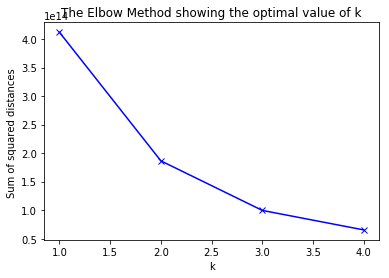

The minimum sum of sqaures of distances is : 6.53938020011e+13  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [89]:
print("Kmeans on data")
get_kmeans(X)

### K-Means on scaled data

Kmeans on scaled data


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 145692.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0       1
Infected #      2348.00  484.00
Uninfected #     466.00  749.00
Infected %        83.44   39.25
Uninfected %      16.56   60.75

Sum of square of distances is: 115492.558243

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
Infected #      2336.00    1.0  495.0
Uninfected #     460.00    0.0  755.0
Infected %        83.55  100.0   39.6
Uninfected %      16.45    0.0   60.4

Sum of square of distances is: 91334.0893349

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2       3
Infected #      2286.00   7.00    1.0  538.00
Uninfected #     409.00  15.00    0.0  791.00
Infected %        84.82  31.82  100.0   40.48
Uninfected %      15.18  68.18    0.0   59.52

Sum of square of distances is: 79362.9536632

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



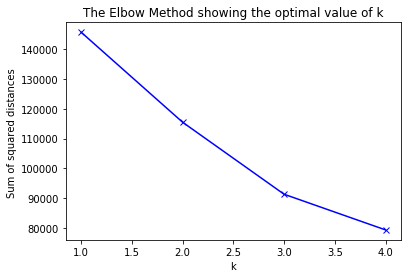

The minimum sum of sqaures of distances is : 79362.9536632  for k 4


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [90]:
print("Kmeans on scaled data")
get_kmeans(scaled_X)

### PCA using 3 components on scaled data

The explained variance for pca applied on scaled data is 0.644166598093 using 3 components
Kmeans on sclaed data with PCA using 3 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 12138.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

Sum of square of distances is: 9147.59741053

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1       2
Infected #      2276.0    1.0  555.00
Uninfected #     453.0    0.0  762.00
Infected %        83.4  100.0   42.14
Uninfected %      16.6    0.0   57.86

Sum of square of distances is: 6959.26271926

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2      3
Infected #      2301.00    1.0  499.0  31.00
Uninfected #     471.00    0.0  730.0  14.00
Infected %        83.01  100.0   40.6  68.89
Uninfected %      16.99    0.0   59.4  31.11

Sum of square of distances is: 5033.38111909

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



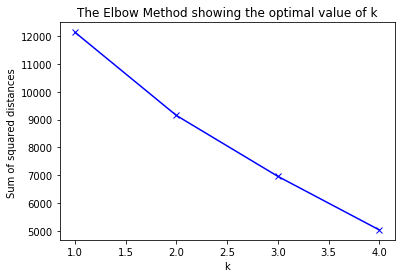

The minimum sum of sqaures of distances is : 5033.38111909  for k 4


In [91]:
pca=PCA(n_components=3,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 3 components")
print("Kmeans on sclaed data with PCA using 3 components:")
model=get_kmeans(X_pca_scaled)

### PCA on scaled data using 4 components

The explained variance for pca applied on scaled data is 0.707458312998 using 4 components
Kmeans on sclaed data with PCA using 4 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 16184.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

Sum of square of distances is: 12785.0553086

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0        1      2
Infected #      632.00  2199.00    1.0
Uninfected #    810.00   405.00    0.0
Infected %       43.83    84.45  100.0
Uninfected %     56.17    15.55    0.0

Sum of square of distances is: 10471.5459318

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1       2      3
Infected #      2196.00    1.0  605.00  30.00
Uninfected #     404.00    0.0  798.00  13.00
Infected %        84.46  100.0   43.12  69.77
Uninfected %      15.54    0.0   56.88  30.23

Sum of square of distances is: 8359.56060256

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



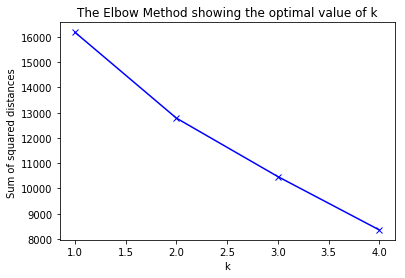

The minimum sum of sqaures of distances is : 8359.56060256  for k 4


In [92]:
### PCA on scaled data using 4 components
pca=PCA(n_components=4,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_4=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 4 components")
print("Kmeans on sclaed data with PCA using 4 components:")
model=get_kmeans(X_pca_scaled_4)

### PCA on scaled data using 5 components

The explained variance for pca applied on scaled data is 0.747118347864 using 5 components
Kmeans on sclaed data with PCA using 5 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 20230.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

Sum of square of distances is: 16816.5824246

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2
Infected #      2040.00  791.0    1.0
Uninfected #     316.00  899.0    0.0
Infected %        86.59   46.8  100.0
Uninfected %      13.41   53.2    0.0

Sum of square of distances is: 14354.8156188

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1      2     3
Infected #      2020.00    1.0  805.0   6.0
Uninfected #     312.00    0.0  897.0   6.0
Infected %        86.62  100.0   47.3  50.0
Uninfected %      13.38    0.0   52.7  50.0

Sum of square of distances is: 11990.153425

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



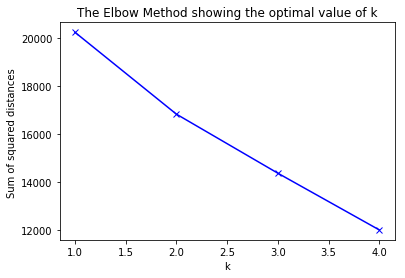

The minimum sum of sqaures of distances is : 11990.153425  for k 4


In [93]:
### PCA on scaled data using 5 components
pca=PCA(n_components=5,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_5=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 5 components")
print("Kmeans on sclaed data with PCA using 5 components:")
model=get_kmeans(X_pca_scaled_5)

### PCA on scaled data using 6 components

The explained variance for pca applied on scaled data is 0.778831967986 using 6 components
Kmeans on sclaed data with PCA using 6 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 24276.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

Sum of square of distances is: 20786.0166095

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels      0      1       2
Infected #      887.0    1.0  1944.0
Uninfected #    927.0    0.0   288.0
Infected %       48.9  100.0    87.1
Uninfected %     51.1    0.0    12.9

Sum of square of distances is: 18242.9359757

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0        1      2      3
Infected #      1822.00  1001.00    1.0   8.00
Uninfected #     244.00   967.00    0.0   4.00
Infected %        88.19    50.86  100.0  66.67
Uninfected %      11.81    49.14    0.0  33.33

Sum of square of distances is: 15643.441188

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



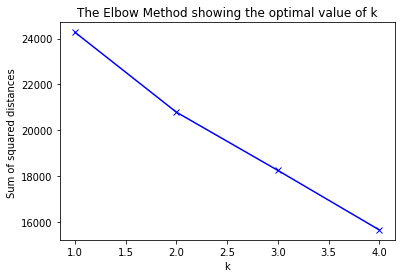

The minimum sum of sqaures of distances is : 15643.441188  for k 4


In [94]:
### PCA on scaled data using 5 components
pca=PCA(n_components=6,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_6=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 6 components")
print("Kmeans on sclaed data with PCA using 6 components:")
model=get_kmeans(X_pca_scaled_6)

### PCA on scaled data using 9 components

The explained variance for pca applied on scaled data is 0.85210316273 using 9 components
Kmeans on sclaed data with PCA using 9 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 36414.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0     1
Infected #      2829.00   3.0
Uninfected #    1212.00   3.0
Infected %        70.01  50.0
Uninfected %      29.99  50.0

Sum of square of distances is: 33442.1115007

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1      2
Infected #      2831.0    1.0    0.0
Uninfected #    1213.0    0.0    2.0
Infected %        70.0  100.0    0.0
Uninfected %      30.0    0.0  100.0

Sum of square of distances is: 30112.9447503

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1     2      3
Infected #      2824.00   4.00   3.0    1.0
Uninfected #    1209.00   3.00   3.0    0.0
Infected %        70.02  57.14  50.0  100.0
Uninfected %      29.98  42.86  50.0    0.0

Sum of square of distances is: 26955.5253074

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



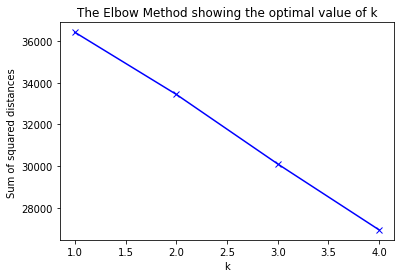

The minimum sum of sqaures of distances is : 26955.5253074  for k 4


In [95]:
### PCA on scaled data using 9 components
pca=PCA(n_components=9,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_9=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 9 components")
print("Kmeans on sclaed data with PCA using 9 components:")
model=get_kmeans(X_pca_scaled_9)

### PCA on scaled data using 11 components

The explained variance for pca applied on scaled data is 0.88917180198 using 11 components
Kmeans on sclaed data with PCA using 11 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 44506.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

Sum of square of distances is: 40676.001567

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1        2
Infected #      943.00    1.0  1888.00
Uninfected #    934.00    0.0   281.00
Infected %       50.24  100.0    87.04
Uninfected %     49.76    0.0    12.96

Sum of square of distances is: 37902.0046982

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1      2        3
Infected #      940.00    0.0    1.0  1891.00
Uninfected #    936.00    1.0    0.0   278.00
Infected %       50.11    0.0  100.0    87.18
Uninfected %     49.89  100.0    0.0    12.82

Sum of square of distances is: 35265.9040269

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



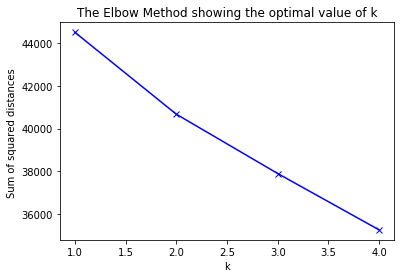

The minimum sum of sqaures of distances is : 35265.9040269  for k 4


In [96]:
### PCA on scaled data using 11 components
pca=PCA(n_components=11,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_11=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 11 components")
print("Kmeans on sclaed data with PCA using 11 components:")
model=get_kmeans(X_pca_scaled_11)

### PCA on scaled data using 12 components

The explained variance for pca applied on scaled data is 0.903626327021 using 12 components
Kmeans on sclaed data with PCA using 12 components:


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

Sum of square of distances is: 48552.0

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

Sum of square of distances is: 44698.9220012

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0      1        2
Infected #      752.00    1.0  2079.00
Uninfected #    877.00    0.0   338.00
Infected %       46.16  100.0    86.02
Uninfected %     53.84    0.0    13.98

Sum of square of distances is: 41932.8519855

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



Cluster_Labels       0       1      2      3
Infected #      994.00  1837.0    1.0    0.0
Uninfected #    937.00   277.0    0.0    1.0
Infected %       51.48    86.9  100.0    0.0
Uninfected %     48.52    13.1    0.0  100.0

Sum of square of distances is: 39284.7447022

---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------



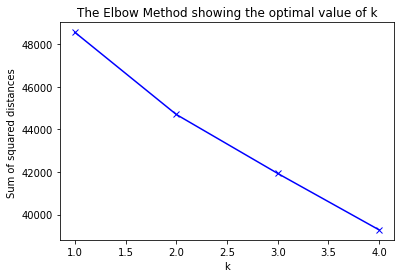

The minimum sum of sqaures of distances is : 39284.7447022  for k 4


In [97]:
### PCA on scaled data using 12 components
pca=PCA(n_components=12,whiten=True,svd_solver='arpack',random_state=0)
X_pca_scaled_12=pca.fit_transform(scaled_X)
print("The explained variance for pca applied on scaled data is",sum(pca.explained_variance_ratio_),"using 12 components")
print("Kmeans on sclaed data with PCA using 12 components:")
model=get_kmeans(X_pca_scaled_12)

### Agglomerative Clustering using PCA-12

In [98]:
def get_agg(data,affinity,linkage='ward'):
    distortions=[]
    for i in range(1,15):
        agg=AgglomerativeClustering(n_clusters=i,affinity=affinity,linkage=linkage)
        agg.fit(data)
        get_purity(agg.labels_)
        print("-------------------------------------------------------------------------------")
    return agg

In [99]:
print("AgglomerativeClustering with PCA and affinity='euclidean'")
get_agg(X_pca_scaled_12,'euclidean','ward')

AgglomerativeClustering with PCA and affinity='euclidean'


Cluster_Labels        0
Infected #      2832.00
Uninfected #    1215.00
Infected %        69.98
Uninfected %      30.02

-------------------------------------------------------------------------------


Cluster_Labels        0      1
Infected #      2831.00    1.0
Uninfected #    1215.00    0.0
Infected %        69.97  100.0
Uninfected %      30.03    0.0

-------------------------------------------------------------------------------


Cluster_Labels        0      1      2
Infected #      2827.00    1.0   4.00
Uninfected #    1212.00    0.0   3.00
Infected %        69.99  100.0  57.14
Uninfected %      30.01    0.0  42.86

-------------------------------------------------------------------------------


Cluster_Labels        0     1      2      3
Infected #      2824.00   3.0   4.00    1.0
Uninfected #    1209.00   3.0   3.00    0.0
Infected %        70.02  50.0  57.14  100.0
Uninfected %      29.98  50.0  42.86    0.0

-------------------------------------------------------------------------------


Cluster_Labels        0      1      2      3     4
Infected #      2824.00    0.0   4.00    1.0   3.0
Uninfected #    1207.00    2.0   3.00    0.0   3.0
Infected %        70.06    0.0  57.14  100.0  50.0
Uninfected %      29.94  100.0  42.86    0.0  50.0

-------------------------------------------------------------------------------


Cluster_Labels        0      1        2      3     4      5
Infected #      1289.00    0.0  1535.00    1.0   3.0   4.00
Uninfected #     110.00    2.0  1097.00    0.0   3.0   3.00
Infected %        92.14    0.0    58.32  100.0  50.0  57.14
Uninfected %       7.86  100.0    41.68    0.0  50.0  42.86

-------------------------------------------------------------------------------


Cluster_Labels        0      1        2      3     4      5      6
Infected #      1535.00    0.0  1275.00    1.0   3.0   4.00   14.0
Uninfected #    1097.00    2.0   110.00    0.0   3.0   3.00    0.0
Infected %        58.32    0.0    92.06  100.0  50.0  57.14  100.0
Uninfected %      41.68  100.0     7.94    0.0  50.0  42.86    0.0

-------------------------------------------------------------------------------


Cluster_Labels        0      1        2      3     4      5      6      7
Infected #      1275.00    0.0  1441.00  94.00   3.0   4.00   14.0    1.0
Uninfected #     110.00    2.0  1056.00  41.00   3.0   3.00    0.0    0.0
Infected %        92.06    0.0    57.71  69.63  50.0  57.14  100.0  100.0
Uninfected %       7.94  100.0    42.29  30.37  50.0  42.86    0.0    0.0

-------------------------------------------------------------------------------


Cluster_Labels      0      1        2        3     4      5      6      7  \
Infected #        4.0    0.0  1441.00  1271.00   3.0   4.00   14.0    1.0   
Uninfected #      0.0    2.0  1056.00   110.00   3.0   3.00    0.0    0.0   
Infected %      100.0    0.0    57.71    92.03  50.0  57.14  100.0  100.0   
Uninfected %      0.0  100.0    42.29     7.97  50.0  42.86    0.0    0.0   

Cluster_Labels      8  
Infected #      94.00  
Uninfected #    41.00  
Infected %      69.63  
Uninfected %    30.37

-------------------------------------------------------------------------------


Cluster_Labels        0      1      2        3     4      5      6      7  \
Infected #      1441.00    0.0   4.00  1271.00   3.0    3.0   14.0    1.0   
Uninfected #    1056.00    2.0   3.00   110.00   3.0    0.0    0.0    0.0   
Infected %        57.71    0.0  57.14    92.03  50.0  100.0  100.0  100.0   
Uninfected %      42.29  100.0  42.86     7.97  50.0    0.0    0.0    0.0   

Cluster_Labels      8      9  
Infected #      94.00    1.0  
Uninfected #    41.00    0.0  
Infected %      69.63  100.0  
Uninfected %    30.37    0.0

-------------------------------------------------------------------------------


Cluster_Labels     0        1      2        3       4      5      6      7   \
Infected #        0.0  1390.00   4.00  1271.00   51.00    3.0   14.0    1.0   
Uninfected #      2.0   953.00   3.00   110.00  103.00    0.0    0.0    0.0   
Infected %        0.0    59.33  57.14    92.03   33.12  100.0  100.0  100.0   
Uninfected %    100.0    40.67  42.86     7.97   66.88    0.0    0.0    0.0   

Cluster_Labels     8      9     10  
Infected #      94.00    1.0   3.0  
Uninfected #    41.00    0.0   3.0  
Infected %      69.63  100.0  50.0  
Uninfected %    30.37    0.0  50.0

-------------------------------------------------------------------------------


Cluster_Labels       0        1      2      3       4      5      6      7   \
Infected #      1390.00  1271.00   4.00  94.00   51.00    3.0   14.0    1.0   
Uninfected #     953.00   110.00   3.00  41.00  103.00    0.0    0.0    0.0   
Infected %        59.33    92.03  57.14  69.63   33.12  100.0  100.0  100.0   
Uninfected %      40.67     7.97  42.86  30.37   66.88    0.0    0.0    0.0   

Cluster_Labels     8      9     10     11  
Infected #        0.0    1.0   3.0    0.0  
Uninfected #      1.0    0.0   3.0    1.0  
Infected %        0.0  100.0  50.0    0.0  
Uninfected %    100.0    0.0  50.0  100.0

-------------------------------------------------------------------------------


Cluster_Labels     0        1       2      3       4      5      6      7   \
Infected #       4.00  1271.00  1353.0  94.00   51.00  37.00   14.0    1.0   
Uninfected #     3.00   110.00   887.0  41.00  103.00  66.00    0.0    0.0   
Infected %      57.14    92.03    60.4  69.63   33.12  35.92  100.0  100.0   
Uninfected %    42.86     7.97    39.6  30.37   66.88  64.08    0.0    0.0   

Cluster_Labels     8      9     10     11     12  
Infected #        0.0    1.0   3.0    0.0    3.0  
Uninfected #      1.0    0.0   3.0    1.0    0.0  
Infected %        0.0  100.0  50.0    0.0  100.0  
Uninfected %    100.0    0.0  50.0  100.0    0.0

-------------------------------------------------------------------------------


Cluster_Labels      0        1      2      3       4      5      6      7   \
Infected #      1353.0  1271.00  37.00  94.00   51.00    3.0   14.0    1.0   
Uninfected #     887.0   110.00  66.00  41.00  103.00    0.0    0.0    0.0   
Infected %        60.4    92.03  35.92  69.63   33.12  100.0  100.0  100.0   
Uninfected %      39.6     7.97  64.08  30.37   66.88    0.0    0.0    0.0   

Cluster_Labels     8      9     10     11    12     13  
Infected #        0.0    1.0   3.0    0.0   3.0    1.0  
Uninfected #      1.0    0.0   3.0    1.0   3.0    0.0  
Infected %        0.0  100.0  50.0    0.0  50.0  100.0  
Uninfected %    100.0    0.0  50.0  100.0  50.0    0.0

-------------------------------------------------------------------------------


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=14,
            pooling_func=<function mean at 0x7f1118103158>)

### feature contribution when using PCA-12

In [100]:
pca=PCA(n_components=12,random_state=0,whiten=True,svd_solver='arpack')
X_pca_12=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12'])
m

Count  Packets Received  Packets Sent  Elapsed_Time  Bytes_sent  \
PC-1   0.240442          0.021149      0.013889     -0.003442    0.008617   
PC-2   0.035895         -0.087901     -0.079105     -0.015431   -0.048396   
PC-3  -0.027244          0.549538      0.534553      0.017832    0.292459   
PC-4   0.124586          0.095652      0.099401      0.009968    0.059609   
PC-5   0.003029          0.020703      0.055129      0.489017    0.034216   
PC-6   0.015238          0.031526      0.050412     -0.398983    0.069498   
PC-7  -0.000731         -0.221571      0.136255      0.083893    0.819273   
PC-8   0.008115         -0.099718      0.024465     -0.051105    0.284398   
PC-9   0.011416          0.009092     -0.016995      0.729199   -0.084415   
PC-10 -0.022024         -0.019176     -0.019770     -0.115172    0.036558   
PC-11  0.032590          0.015767      0.005621     -0.176993   -0.033938   
PC-12  0.012636          0.007705      0.045041      0.108973   -0.013517   

       Bytes_received  Source_Port  Destination_Port  Application  Source_IP  \
PC-1         0.022419     0.225722          0.065336     0.164688   0.099022   
PC-2        -0.084018    -0.147763         -0.100701    -0.151292  -0.089952   
PC-3         0.509414    -0.021024         -0.012955     0.077746   0.060132   
PC-4         0.083726     0.012749         -0.106113    -0.215064  -0.215013   
PC-5         0.002439    -0.076792          0.559823    -0.258243  -0.332679   
PC-6         0.022046     0.024720         -0.355232    -0.186510  -0.294848   
PC-7        -0.365193    -0.015887         -0.058416    -0.035758   0.028091   
PC-8        -0.145661     0.016362          0.102891     0.072817   0.128334   
PC-9         0.007624     0.056314         -0.446180     0.075239   0.279190   
PC-10       -0.015039     0.095778         -0.014117     0.254319   0.454719   
PC-11        0.026663    -0.133226          0.296736    -0.107322   0.500296   
PC-12       -0.009954    -0.043279         -0.225980    -0.092977  -0.004998   

       Destination_IP  Received_Time_diff         0         1         2  \
PC-1         0.188601           -0.060239  0.185825  0.174754  0.177771   
PC-2        -0.167330            0.081503  0.273880  0.268282  0.197054   
PC-3         0.017277           -0.059573  0.018988  0.010044 -0.008636   
PC-4        -0.187932            0.155386  0.172437  0.226791  0.284319   
PC-5         0.177393            0.327260 -0.060306 -0.061329 -0.057703   
PC-6        -0.201878            0.298913 -0.120632 -0.165160 -0.163257   
PC-7        -0.043205            0.138945  0.026627  0.015296 -0.002676   
PC-8         0.035333           -0.541082 -0.061903 -0.032111  0.018967   
PC-9        -0.193428            0.017779 -0.022592 -0.039618 -0.024875   
PC-10        0.144602            0.650274 -0.052047 -0.037107  0.004789   
PC-11       -0.113124            0.125084  0.067702  0.124492  0.099974   
PC-12       -0.215348            0.006450  0.001639  0.064332  0.085979   

              3         4         5         6         7         8         9  \
PC-1   0.175937  0.142786  0.138339  0.131112  0.138025  0.147469  0.157689   
PC-2  -0.113936 -0.263795 -0.286618 -0.297394 -0.285284 -0.262127 -0.230630   
PC-3  -0.065003 -0.103240 -0.107696 -0.110751 -0.081310 -0.051390 -0.036258   
PC-4   0.310714  0.306708  0.308638  0.264996  0.128341 -0.032850 -0.136788   
PC-5   0.001828  0.027947  0.035481  0.033136 -0.009039 -0.071721 -0.090995   
PC-6  -0.049159  0.041052  0.055664  0.091715  0.082402  0.020997  0.063233   
PC-7  -0.091394 -0.083399 -0.042414 -0.006411  0.069114  0.125846  0.119350   
PC-8   0.176154  0.171554  0.137068  0.056059 -0.114192 -0.316449 -0.314682   
PC-9  -0.036286  0.008114  0.008542  0.039785  0.074422  0.042231  0.045163   
PC-10  0.181932  0.135629  0.065490 -0.071306 -0.221604 -0.262413 -0.185375   
PC-11 -0.180356 -0.143149 -0.031222  0.162372  0.324246  0.189173 -0.006583   
PC-12  0.069528  0.101402  0.091960  0.0206

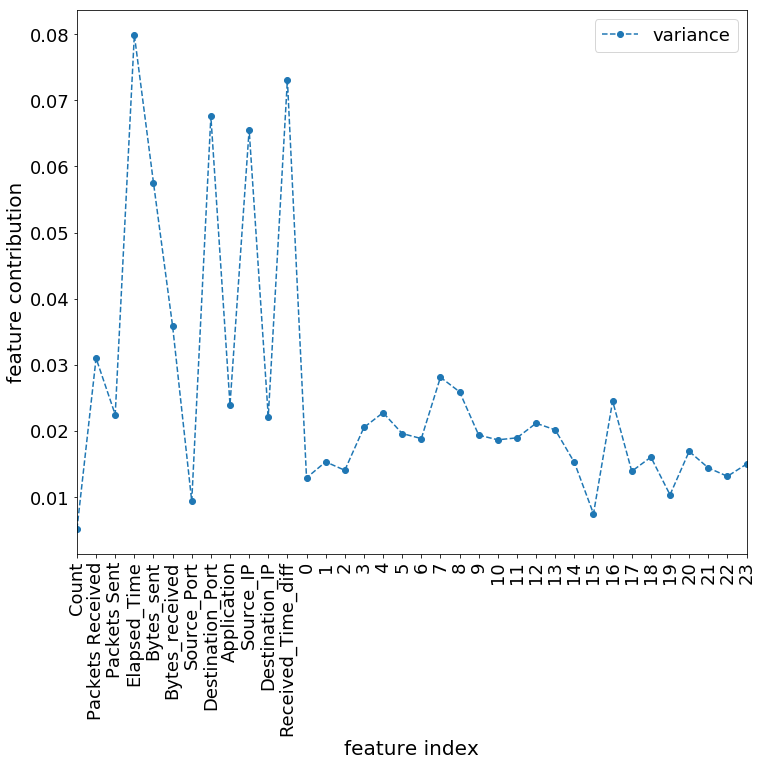

In [101]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribution using PCA-11

In [102]:
pca=PCA(n_components=11,random_state=0,whiten=True,svd_solver='arpack')
X_pca1_11=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11'])
m

Count  Packets Received  Packets Sent  Elapsed_Time  Bytes_sent  \
PC-1   0.240442          0.021149      0.013889     -0.003442    0.008617   
PC-2   0.035895         -0.087901     -0.079105     -0.015431   -0.048396   
PC-3  -0.027244          0.549538      0.534553      0.017832    0.292459   
PC-4   0.124586          0.095652      0.099401      0.009968    0.059609   
PC-5   0.003029          0.020703      0.055129      0.489017    0.034216   
PC-6   0.015238          0.031526      0.050412     -0.398983    0.069498   
PC-7  -0.000731         -0.221571      0.136255      0.083893    0.819273   
PC-8   0.008115         -0.099718      0.024465     -0.051105    0.284398   
PC-9   0.011416          0.009092     -0.016995      0.729199   -0.084415   
PC-10 -0.022024         -0.019176     -0.019770     -0.115172    0.036558   
PC-11  0.032590          0.015767      0.005621     -0.176993   -0.033938   

       Bytes_received  Source_Port  Destination_Port  Application  Source_IP  \
PC-1         0.022419     0.225722          0.065336     0.164688   0.099022   
PC-2        -0.084018    -0.147763         -0.100701    -0.151292  -0.089952   
PC-3         0.509414    -0.021024         -0.012955     0.077746   0.060132   
PC-4         0.083726     0.012749         -0.106113    -0.215064  -0.215013   
PC-5         0.002439    -0.076792          0.559823    -0.258243  -0.332679   
PC-6         0.022046     0.024720         -0.355232    -0.186510  -0.294848   
PC-7        -0.365193    -0.015887         -0.058416    -0.035758   0.028091   
PC-8        -0.145661     0.016362          0.102891     0.072817   0.128334   
PC-9         0.007624     0.056314         -0.446180     0.075239   0.279190   
PC-10       -0.015039     0.095778         -0.014117     0.254319   0.454719   
PC-11        0.026663    -0.133226          0.296736    -0.107322   0.500296   

       Destination_IP  Received_Time_diff         0         1         2  \
PC-1         0.188601           -0.060239  0.185825  0.174754  0.177771   
PC-2        -0.167330            0.081503  0.273880  0.268282  0.197054   
PC-3         0.017277           -0.059573  0.018988  0.010044 -0.008636   
PC-4        -0.187932            0.155386  0.172437  0.226791  0.284319   
PC-5         0.177393            0.327260 -0.060306 -0.061329 -0.057703   
PC-6        -0.201878            0.298913 -0.120632 -0.165160 -0.163257   
PC-7        -0.043205            0.138945  0.026627  0.015296 -0.002676   
PC-8         0.035333           -0.541082 -0.061903 -0.032111  0.018967   
PC-9        -0.193428            0.017779 -0.022592 -0.039618 -0.024875   
PC-10        0.144602            0.650274 -0.052047 -0.037107  0.004789   
PC-11       -0.113124            0.125084  0.067702  0.124492  0.099974   

              3         4         5         6         7         8         9  \
PC-1   0.175937  0.142786  0.138339  0.131112  0.138025  0.147469  0.157689   
PC-2  -0.113936 -0.263795 -0.286618 -0.297394 -0.285284 -0.262127 -0.230630   
PC-3  -0.065003 -0.103240 -0.107696 -0.110751 -0.081310 -0.051390 -0.036258   
PC-4   0.310714  0.306708  0.308638  0.264996  0.128341 -0.032850 -0.136788   
PC-5   0.001828  0.027947  0.035481  0.033136 -0.009039 -0.071721 -0.090995   
PC-6  -0.049159  0.041052  0.055664  0.091715  0.082402  0.020997  0.063233   
PC-7  -0.091394 -0.083399 -0.042414 -0.006411  0.069114  0.125846  0.119350   
PC-8   0.176154  0.171554  0.137068  0.056059 -0.114192 -0.316449 -0.314682   
PC-9  -0.036286  0.008114  0.008542  0.039785  0.074422  0.042231  0.045163   
PC-10  0.181932  0.135629  0.065490 -0.071306 -0.221604 -0.262413 -0.185375   
PC-11 -0.180356 -0.143149 -0.031222  0.162372  0.324246  0.189173 -0.006583   

             10        11        12        13        14        15        16  \
PC-1   0.158981  0.204409  0.204236  0.196907  0.192626  0.209406  0.166099   
PC-2  -0.182954  0.058283  0.086339 -0.017462  0.027247  0.095738 -0.057211   
PC-3  -0.010662  0.008103  0.011773  

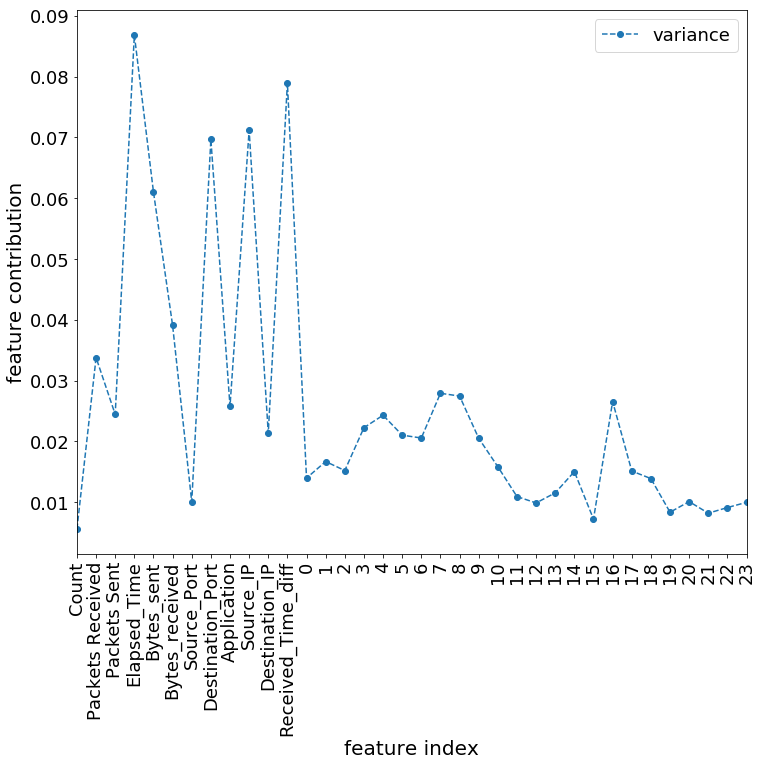

In [103]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribution using PCA-9

In [104]:
pca=PCA(n_components=9,random_state=0,whiten=True,svd_solver='arpack')
X_pca_9=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9'])
m

Count  Packets Received  Packets Sent  Elapsed_Time  Bytes_sent  \
PC-1  0.240442          0.021149      0.013889     -0.003442    0.008617   
PC-2  0.035895         -0.087901     -0.079105     -0.015431   -0.048396   
PC-3 -0.027244          0.549538      0.534553      0.017832    0.292459   
PC-4  0.124586          0.095652      0.099401      0.009968    0.059609   
PC-5  0.003029          0.020703      0.055129      0.489017    0.034216   
PC-6  0.015238          0.031526      0.050412     -0.398983    0.069498   
PC-7 -0.000731         -0.221571      0.136255      0.083893    0.819273   
PC-8  0.008115         -0.099718      0.024465     -0.051105    0.284398   
PC-9  0.011416          0.009092     -0.016995      0.729199   -0.084415   

      Bytes_received  Source_Port  Destination_Port  Application  Source_IP  \
PC-1        0.022419     0.225722          0.065336     0.164688   0.099022   
PC-2       -0.084018    -0.147763         -0.100701    -0.151292  -0.089952   
PC-3        0.509414    -0.021024         -0.012955     0.077746   0.060132   
PC-4        0.083726     0.012749         -0.106113    -0.215064  -0.215013   
PC-5        0.002439    -0.076792          0.559823    -0.258243  -0.332679   
PC-6        0.022046     0.024720         -0.355232    -0.186510  -0.294848   
PC-7       -0.365193    -0.015887         -0.058416    -0.035758   0.028091   
PC-8       -0.145661     0.016362          0.102891     0.072817   0.128334   
PC-9        0.007624     0.056314         -0.446180     0.075239   0.279190   

      Destination_IP  Received_Time_diff         0         1         2  \
PC-1        0.188601           -0.060239  0.185825  0.174754  0.177771   
PC-2       -0.167330            0.081503  0.273880  0.268282  0.197054   
PC-3        0.017277           -0.059573  0.018988  0.010044 -0.008636   
PC-4       -0.187932            0.155386  0.172437  0.226791  0.284319   
PC-5        0.177393            0.327260 -0.060306 -0.061329 -0.057703   
PC-6       -0.201878            0.298913 -0.120632 -0.165160 -0.163257   
PC-7       -0.043205            0.138945  0.026627  0.015296 -0.002676   
PC-8        0.035333           -0.541082 -0.061903 -0.032111  0.018967   
PC-9       -0.193428            0.017779 -0.022592 -0.039618 -0.024875   

             3         4         5         6         7         8         9  \
PC-1  0.175937  0.142786  0.138339  0.131112  0.138025  0.147469  0.157689   
PC-2 -0.113936 -0.263795 -0.286618 -0.297394 -0.285284 -0.262127 -0.230630   
PC-3 -0.065003 -0.103240 -0.107696 -0.110751 -0.081310 -0.051390 -0.036258   
PC-4  0.310714  0.306708  0.308638  0.264996  0.128341 -0.032850 -0.136788   
PC-5  0.001828  0.027947  0.035481  0.033136 -0.009039 -0.071721 -0.090995   
PC-6 -0.049159  0.041052  0.055664  0.091715  0.082402  0.020997  0.063233   
PC-7 -0.091394 -0.083399 -0.042414 -0.006411  0.069114  0.125846  0.119350   
PC-8  0.176154  0.171554  0.137068  0.056059 -0.114192 -0.316449 -0.314682   
PC-9 -0.036286  0.008114  0.008542  0.039785  0.074422  0.042231  0.045163   

            10        11        12        13        14        15        16  \
PC-1  0.158981  0.204409  0.204236  0.196907  0.192626  0.209406  0.166099   
PC-2 -0.182954  0.058283  0.086339 -0.017462  0.027247  0.095738 -0.057211   
PC-3 -0.010662  0.008103  0.011773  0.002445  0.013536  0.014565  0.007492   
PC-4 -0.214175 -0.064671 -0.043621 -0.155630 -0.220998 -0.102690 -0.272696   
PC-5 -0.043403 -0.073141  0.029843  0.048032  0.129337  0.079792  0.181624   
PC-6 -0.045828 -0.107969 -0.149943 -0.038423  0.241556  0.049683  0.343020   
PC-7  0.105806  0.080899  0.023196  0.006718 -0.062662 -0.006659 -0.102210   
PC-8 -0.277609 -0.193838 -0.065492 -0.064522  0.155991  0.022452  0.233083   
PC-9 -0.079874 -0.082659 -0.162327 -0.156383  0.060115 -0.063954  0.091488   

            17        18        19        20        21        22        23  
PC-1  0.188577  0.202453  0.207735  0.214657  0.216296  0.212504  0.214004  


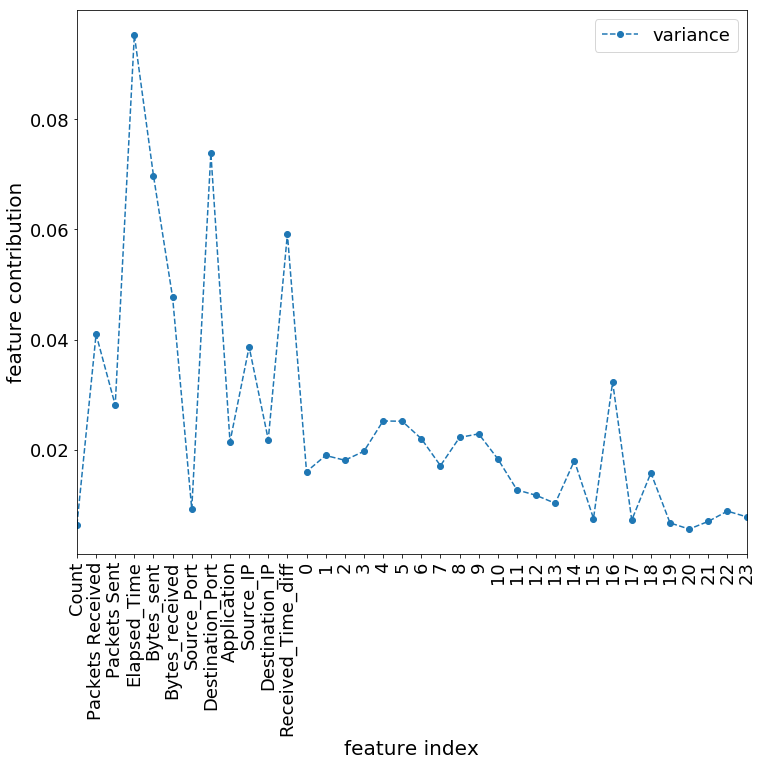

In [105]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribtuion using PCA-6

In [106]:
pca=PCA(n_components=6,random_state=0,whiten=True,svd_solver='arpack')
X_pca1_6=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])
m

Count  Packets Received  Packets Sent  Elapsed_Time  Bytes_sent  \
PC-1  0.240442          0.021149      0.013889     -0.003442    0.008617   
PC-2  0.035895         -0.087901     -0.079105     -0.015431   -0.048396   
PC-3 -0.027244          0.549538      0.534553      0.017832    0.292459   
PC-4  0.124586          0.095652      0.099401      0.009968    0.059609   
PC-5  0.003029          0.020703      0.055129      0.489017    0.034216   
PC-6  0.015238          0.031526      0.050412     -0.398983    0.069498   

      Bytes_received  Source_Port  Destination_Port  Application  Source_IP  \
PC-1        0.022419     0.225722          0.065336     0.164688   0.099022   
PC-2       -0.084018    -0.147763         -0.100701    -0.151292  -0.089952   
PC-3        0.509414    -0.021024         -0.012955     0.077746   0.060132   
PC-4        0.083726     0.012749         -0.106113    -0.215064  -0.215013   
PC-5        0.002439    -0.076792          0.559823    -0.258243  -0.332679   
PC-6        0.022046     0.024720         -0.355232    -0.186510  -0.294848   

      Destination_IP  Received_Time_diff         0         1         2  \
PC-1        0.188601           -0.060239  0.185825  0.174754  0.177771   
PC-2       -0.167330            0.081503  0.273880  0.268282  0.197054   
PC-3        0.017277           -0.059573  0.018988  0.010044 -0.008636   
PC-4       -0.187932            0.155386  0.172437  0.226791  0.284319   
PC-5        0.177393            0.327260 -0.060306 -0.061329 -0.057703   
PC-6       -0.201878            0.298913 -0.120632 -0.165160 -0.163257   

             3         4         5         6         7         8         9  \
PC-1  0.175937  0.142786  0.138339  0.131112  0.138025  0.147469  0.157689   
PC-2 -0.113936 -0.263795 -0.286618 -0.297394 -0.285284 -0.262127 -0.230630   
PC-3 -0.065003 -0.103240 -0.107696 -0.110751 -0.081310 -0.051390 -0.036258   
PC-4  0.310714  0.306708  0.308638  0.264996  0.128341 -0.032850 -0.136788   
PC-5  0.001828  0.027947  0.035481  0.033136 -0.009039 -0.071721 -0.090995   
PC-6 -0.049159  0.041052  0.055664  0.091715  0.082402  0.020997  0.063233   

            10        11        12        13        14        15        16  \
PC-1  0.158981  0.204409  0.204236  0.196907  0.192626  0.209406  0.166099   
PC-2 -0.182954  0.058283  0.086339 -0.017462  0.027247  0.095738 -0.057211   
PC-3 -0.010662  0.008103  0.011773  0.002445  0.013536  0.014565  0.007492   
PC-4 -0.214175 -0.064671 -0.043621 -0.155630 -0.220998 -0.102690 -0.272696   
PC-5 -0.043403 -0.073141  0.029843  0.048032  0.129337  0.079792  0.181624   
PC-6 -0.045828 -0.107969 -0.149943 -0.038423  0.241556  0.049683  0.343020   

            17        18        19        20        21        22        23  
PC-1  0.188577  0.202453  0.207735  0.214657  0.216296  0.212504  0.214004  
PC-2  0.243836  0.053748  0.190045  0.078026  0.139693  0.188504  0.133479  
PC-3  0.016557  0.007472  0.012224  0.014398  0.018252  0.012821  0.015387  
PC-4 -0.004423 -0.145495 -0.016702 -0.035598 -0.008374  0.045587  0.047426  
PC-5  0.079859  0.107992  0.064207 -0.018491 -0.036962 -0.040868 -0.039371  
PC-6  0.160625  0.276614  0.172648  0.058019  0.019397 -0.021784 -0.072400

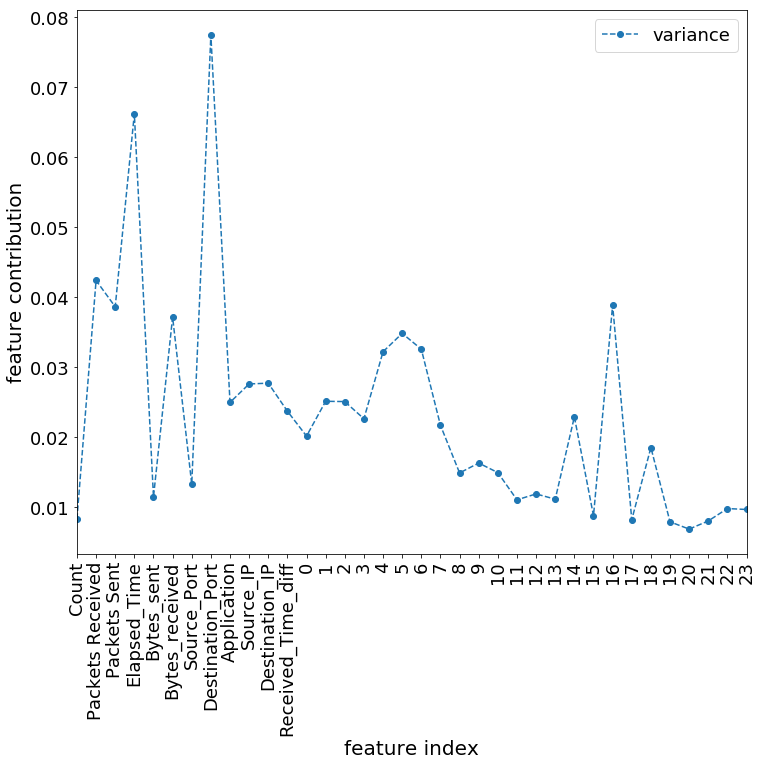

In [107]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribtuion using PCA-5

In [108]:
pca=PCA(n_components=5,random_state=0,whiten=True,svd_solver='arpack')
X_pca1_5=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5'])
m

Count  Packets Received  Packets Sent  Elapsed_Time  Bytes_sent  \
PC-1  0.240442          0.021149      0.013889     -0.003442    0.008617   
PC-2  0.035895         -0.087901     -0.079105     -0.015431   -0.048396   
PC-3 -0.027244          0.549538      0.534553      0.017832    0.292459   
PC-4  0.124586          0.095652      0.099401      0.009968    0.059609   
PC-5  0.003029          0.020703      0.055129      0.489017    0.034216   

      Bytes_received  Source_Port  Destination_Port  Application  Source_IP  \
PC-1        0.022419     0.225722          0.065336     0.164688   0.099022   
PC-2       -0.084018    -0.147763         -0.100701    -0.151292  -0.089952   
PC-3        0.509414    -0.021024         -0.012955     0.077746   0.060132   
PC-4        0.083726     0.012749         -0.106113    -0.215064  -0.215013   
PC-5        0.002439    -0.076792          0.559823    -0.258243  -0.332679   

      Destination_IP  Received_Time_diff         0         1         2  \
PC-1        0.188601           -0.060239  0.185825  0.174754  0.177771   
PC-2       -0.167330            0.081503  0.273880  0.268282  0.197054   
PC-3        0.017277           -0.059573  0.018988  0.010044 -0.008636   
PC-4       -0.187932            0.155386  0.172437  0.226791  0.284319   
PC-5        0.177393            0.327260 -0.060306 -0.061329 -0.057703   

             3         4         5         6         7         8         9  \
PC-1  0.175937  0.142786  0.138339  0.131112  0.138025  0.147469  0.157689   
PC-2 -0.113936 -0.263795 -0.286618 -0.297394 -0.285284 -0.262127 -0.230630   
PC-3 -0.065003 -0.103240 -0.107696 -0.110751 -0.081310 -0.051390 -0.036258   
PC-4  0.310714  0.306708  0.308638  0.264996  0.128341 -0.032850 -0.136788   
PC-5  0.001828  0.027947  0.035481  0.033136 -0.009039 -0.071721 -0.090995   

            10        11        12        13        14        15        16  \
PC-1  0.158981  0.204409  0.204236  0.196907  0.192626  0.209406  0.166099   
PC-2 -0.182954  0.058283  0.086339 -0.017462  0.027247  0.095738 -0.057211   
PC-3 -0.010662  0.008103  0.011773  0.002445  0.013536  0.014565  0.007492   
PC-4 -0.214175 -0.064671 -0.043621 -0.155630 -0.220998 -0.102690 -0.272696   
PC-5 -0.043403 -0.073141  0.029843  0.048032  0.129337  0.079792  0.181624   

            17        18        19        20        21        22        23  
PC-1  0.188577  0.202453  0.207735  0.214657  0.216296  0.212504  0.214004  
PC-2  0.243836  0.053748  0.190045  0.078026  0.139693  0.188504  0.133479  
PC-3  0.016557  0.007472  0.012224  0.014398  0.018252  0.012821  0.015387  
PC-4 -0.004423 -0.145495 -0.016702 -0.035598 -0.008374  0.045587  0.047426  
PC-5  0.079859  0.107992  0.064207 -0.018491 -0.036962 -0.040868 -0.039371

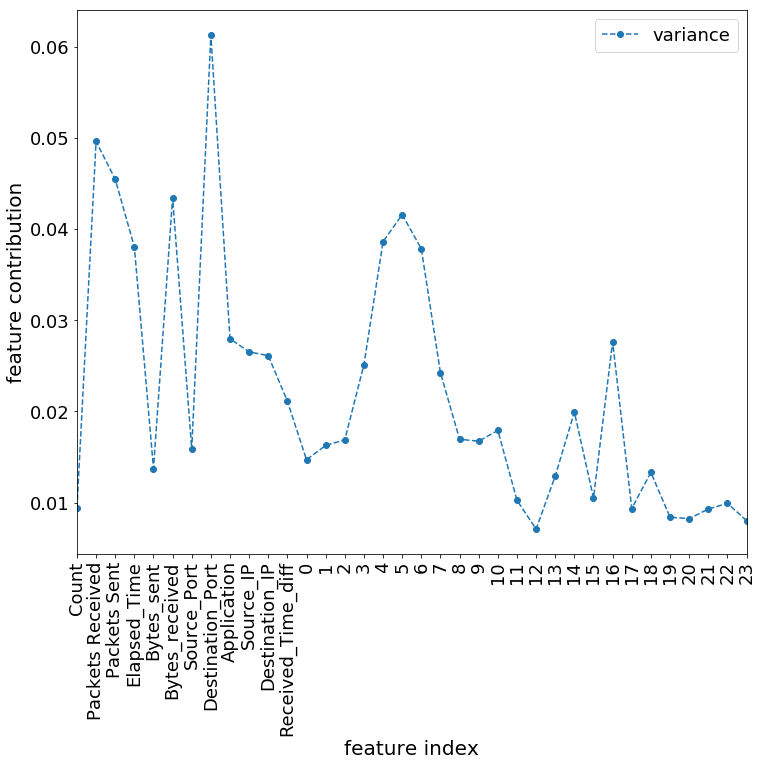

In [109]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribtuion using PCA-4

In [110]:
pca=PCA(n_components=4,random_state=0,whiten=True,svd_solver='arpack')
X_pca1_4=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3','PC-4'])
m

Count  Packets Received  Packets Sent  Elapsed_Time  Bytes_sent  \
PC-1  0.240442          0.021149      0.013889     -0.003442    0.008617   
PC-2  0.035895         -0.087901     -0.079105     -0.015431   -0.048396   
PC-3 -0.027244          0.549538      0.534553      0.017832    0.292459   
PC-4  0.124586          0.095652      0.099401      0.009968    0.059609   

      Bytes_received  Source_Port  Destination_Port  Application  Source_IP  \
PC-1        0.022419     0.225722          0.065336     0.164688   0.099022   
PC-2       -0.084018    -0.147763         -0.100701    -0.151292  -0.089952   
PC-3        0.509414    -0.021024         -0.012955     0.077746   0.060132   
PC-4        0.083726     0.012749         -0.106113    -0.215064  -0.215013   

      Destination_IP  Received_Time_diff         0         1         2  \
PC-1        0.188601           -0.060239  0.185825  0.174754  0.177771   
PC-2       -0.167330            0.081503  0.273880  0.268282  0.197054   
PC-3        0.017277           -0.059573  0.018988  0.010044 -0.008636   
PC-4       -0.187932            0.155386  0.172437  0.226791  0.284319   

             3         4         5         6         7         8         9  \
PC-1  0.175937  0.142786  0.138339  0.131112  0.138025  0.147469  0.157689   
PC-2 -0.113936 -0.263795 -0.286618 -0.297394 -0.285284 -0.262127 -0.230630   
PC-3 -0.065003 -0.103240 -0.107696 -0.110751 -0.081310 -0.051390 -0.036258   
PC-4  0.310714  0.306708  0.308638  0.264996  0.128341 -0.032850 -0.136788   

            10        11        12        13        14        15        16  \
PC-1  0.158981  0.204409  0.204236  0.196907  0.192626  0.209406  0.166099   
PC-2 -0.182954  0.058283  0.086339 -0.017462  0.027247  0.095738 -0.057211   
PC-3 -0.010662  0.008103  0.011773  0.002445  0.013536  0.014565  0.007492   
PC-4 -0.214175 -0.064671 -0.043621 -0.155630 -0.220998 -0.102690 -0.272696   

            17        18        19        20        21        22        23  
PC-1  0.188577  0.202453  0.207735  0.214657  0.216296  0.212504  0.214004  
PC-2  0.243836  0.053748  0.190045  0.078026  0.139693  0.188504  0.133479  
PC-3  0.016557  0.007472  0.012224  0.014398  0.018252  0.012821  0.015387  
PC-4 -0.004423 -0.145495 -0.016702 -0.035598 -0.008374  0.045587  0.047426

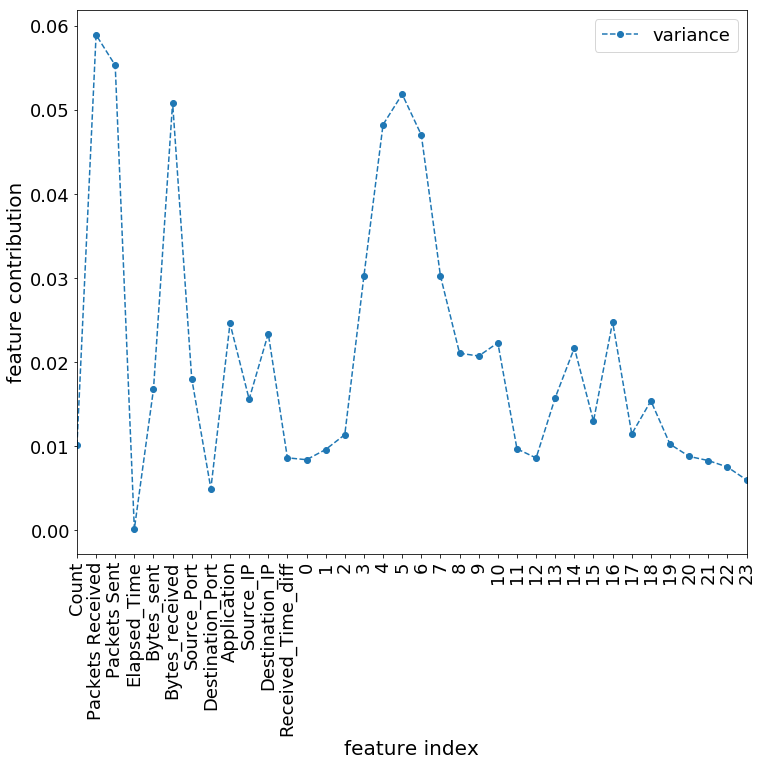

In [111]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

### Feature Contribution using  PCA-3

In [112]:
pca=PCA(n_components=3,random_state=0,whiten=True,svd_solver='arpack')
X_pca_3=pca.fit_transform(scaled_X)
m=pd.DataFrame(pca.components_,columns=orig_X.columns,index = ['PC-1','PC-2','PC-3'])
m

Count  Packets Received  Packets Sent  Elapsed_Time  Bytes_sent  \
PC-1  0.240442          0.021149      0.013889     -0.003442    0.008617   
PC-2  0.035895         -0.087901     -0.079105     -0.015431   -0.048396   
PC-3 -0.027244          0.549538      0.534553      0.017832    0.292459   

      Bytes_received  Source_Port  Destination_Port  Application  Source_IP  \
PC-1        0.022419     0.225722          0.065336     0.164688   0.099022   
PC-2       -0.084018    -0.147763         -0.100701    -0.151292  -0.089952   
PC-3        0.509414    -0.021024         -0.012955     0.077746   0.060132   

      Destination_IP  Received_Time_diff         0         1         2  \
PC-1        0.188601           -0.060239  0.185825  0.174754  0.177771   
PC-2       -0.167330            0.081503  0.273880  0.268282  0.197054   
PC-3        0.017277           -0.059573  0.018988  0.010044 -0.008636   

             3         4         5         6         7         8         9  \
PC-1  0.175937  0.142786  0.138339  0.131112  0.138025  0.147469  0.157689   
PC-2 -0.113936 -0.263795 -0.286618 -0.297394 -0.285284 -0.262127 -0.230630   
PC-3 -0.065003 -0.103240 -0.107696 -0.110751 -0.081310 -0.051390 -0.036258   

            10        11        12        13        14        15        16  \
PC-1  0.158981  0.204409  0.204236  0.196907  0.192626  0.209406  0.166099   
PC-2 -0.182954  0.058283  0.086339 -0.017462  0.027247  0.095738 -0.057211   
PC-3 -0.010662  0.008103  0.011773  0.002445  0.013536  0.014565  0.007492   

            17        18        19        20        21        22        23  
PC-1  0.188577  0.202453  0.207735  0.214657  0.216296  0.212504  0.214004  
PC-2  0.243836  0.053748  0.190045  0.078026  0.139693  0.188504  0.133479  
PC-3  0.016557  0.007472  0.012224  0.014398  0.018252  0.012821  0.015387

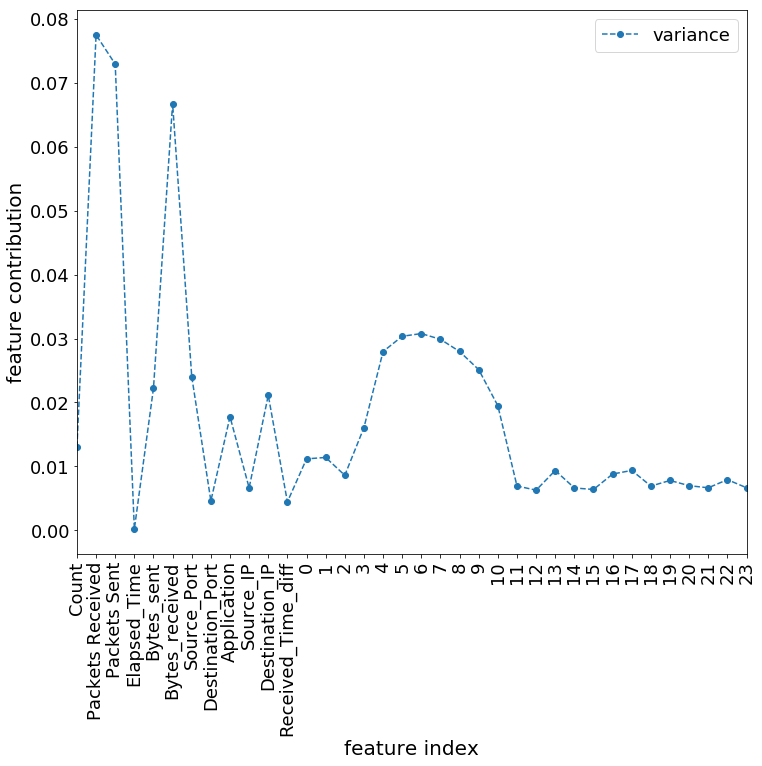

In [113]:
pca_inv_data = pca.components_

fig = plt.figure(figsize=(12, 10))
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20)
plt.xlabel('feature index', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),orig_X.columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

In [114]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')